In [1]:
import numpy as np
import xarray as xr
import ecco_v4_py as ecco

import matplotlib.pyplot as plt

In [2]:
def read_float32(fileIn):
    with open(fileIn, 'rb') as f:
        data = np.fromfile(f, dtype=np.dtype('>f'))
        print(np.shape(data))
    return data

def write_float32(fout,fld):
    with open(fout, 'wb') as f:
        np.array(fld, dtype=">f").tofile(f)

## New vs Old Bathymetry

In [3]:
dir = '/scratch/atnguyen/llc1080/global/run_template/'
fname = 'LLC_1080_bathy_wet.bin'

In [4]:
nx = 1080

bathy = read_float32(dir + fname)
bathy = bathy.reshape(nx*13, nx)

(15163200,)


In [5]:
# plt.pcolormesh(bathy)
# plt.colorbar()

llc_compact_to_faces: dims, llc  (14040, 1080) 1080
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (13, 1080, 1080)
llc_faces_to_tiles: data_tiles dtype  float32


(<Figure size 900x789 with 17 Axes>, None)

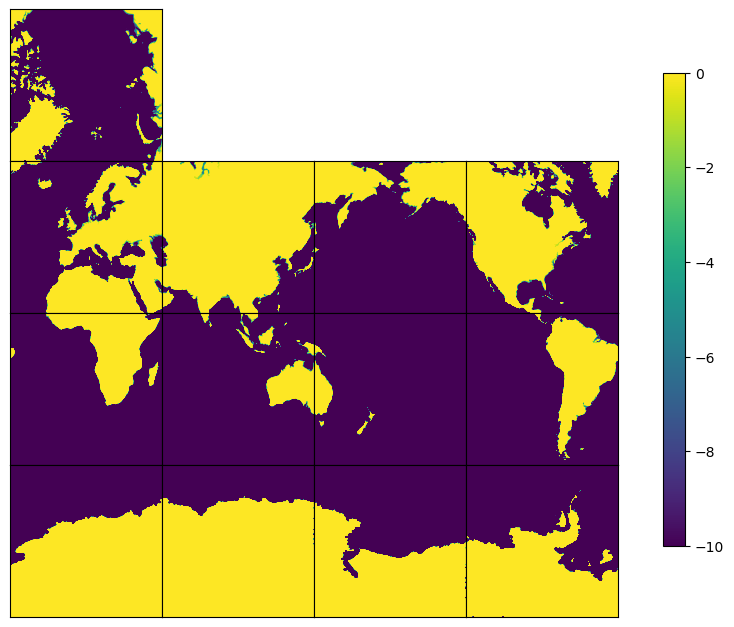

In [19]:
tiles = ecco.llc_compact_to_tiles(bathy)
ecco.plot_tiles(tiles, layout='latlon',rotate_to_latlon=True,show_tile_labels=False, show_colorbar=True, cmin = -10, cmax = 0)

In [7]:
old_dir = '/scratch/atnguyen/llc1080/global/run_template/'

bathy_old = read_float32(old_dir + 'bathy1080_g5_r4_v2a.bin')
bathy_old = bathy_old.reshape(nx*13, nx)

(15163200,)


llc_compact_to_faces: dims, llc  (14040, 1080) 1080
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 1080, 1080)
llc_faces_to_tiles: data_tiles dtype  >f4


(<Figure size 900x789 with 17 Axes>, None)

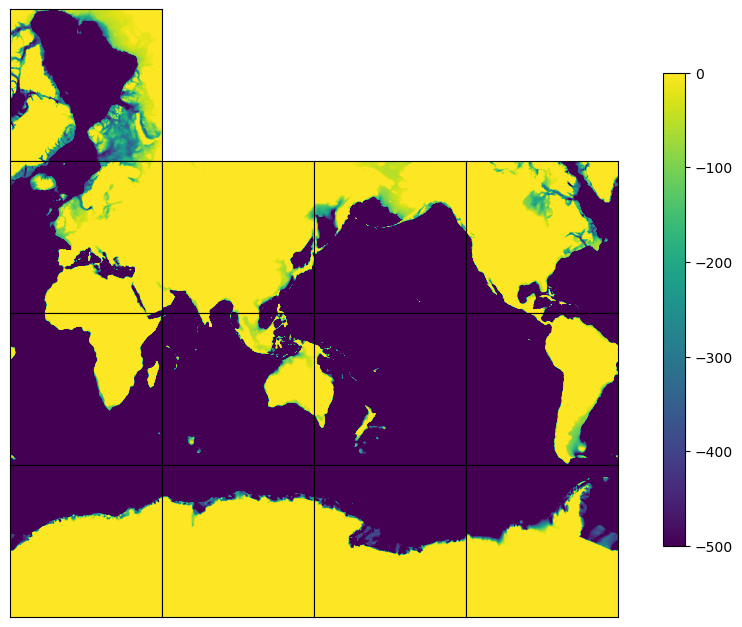

In [17]:
tiles_old = ecco.llc_compact_to_tiles(bathy_old)
ecco.plot_tiles(tiles_old, layout='latlon',rotate_to_latlon=True,show_tile_labels=False, show_colorbar=True, cmin = -500, cmax = 0)

In [9]:
np.sum(bathy_old + bathy)

234687220.0

In [12]:
bathy = -bathy
bathy

array([[   -0. ,    -0. ,    -0. , ...,    -0. ,    -0. ,    -0. ],
       [   -0. ,    -0. ,    -0. , ...,    -0. ,    -0. ,    -0. ],
       [   -0. ,    -0. ,    -0. , ...,    -0. ,    -0. ,    -0. ],
       ...,
       [   -0. ,    -0. ,    -0. , ..., -5151. , -5113. , -5080.5],
       [-5188.5, -5216. , -5369. , ..., -3143. , -3206. , -3212. ],
       [-3215. , -3198. , -3233. , ...,    -0. ,    -0. ,    -0. ]],
      dtype=float32)

llc_compact_to_faces: dims, llc  (14040, 1080) 1080
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (13, 1080, 1080)
llc_faces_to_tiles: data_tiles dtype  float32


(<Figure size 900x789 with 17 Axes>, None)

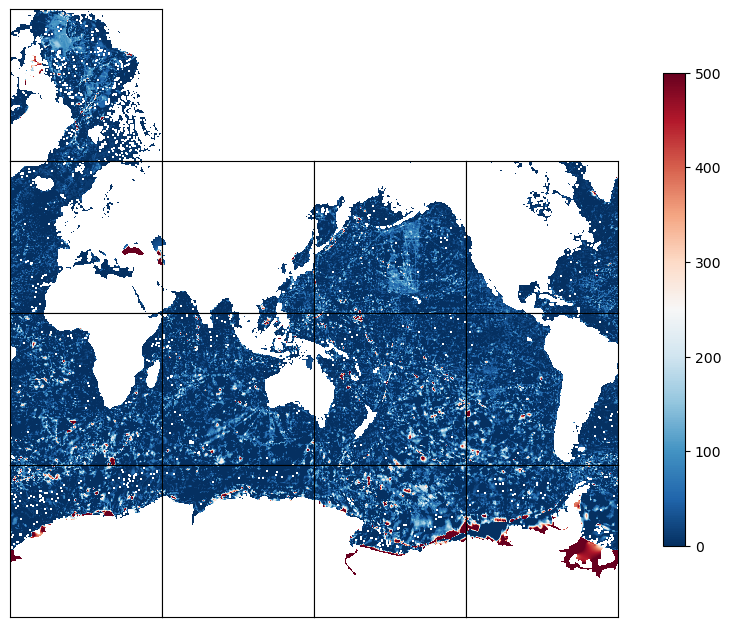

In [15]:
diff_bathy = ecco.llc_compact_to_tiles(bathy_old - bathy)
diff_bathy[diff_bathy == 0] = np.nan
ecco.plot_tiles(diff_bathy, layout='latlon',rotate_to_latlon=True,show_tile_labels=False, show_colorbar=True, cmin = 0, cmax = 500)



In [11]:
np.nanmax(diff_bathy), np.nanmin(diff_bathy)

(6014.0, -2924.9414)

## Old Bathymetry vs Depth

In [12]:
np.shape(bathy_old) # 1080*13, 1080


(14040, 1080)

In [13]:
depth_dir = '/scratch/shoshi/MITgcm_c68p/llc1080/run_pk0000000000_120x120x757_eccopkg_off/'
depth = read_float32(depth_dir + 'Depth.data').reshape(nx*13, nx)
depth

(15163200,)


array([[   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ..., 5103.076 , 5079.885 ,
        5121.1313],
       [5271.822 , 5185.425 , 5250.8037, ..., 3126.7415, 3219.3445,
        3196.334 ],
       [3163.41  , 3163.41  , 3213.5789, ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

In [14]:
# depth[depth == 0] = np.nan

llc_compact_to_faces: dims, llc  (14040, 1080) 1080
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 1080, 1080)
llc_faces_to_tiles: data_tiles dtype  >f4


(<Figure size 900x789 with 17 Axes>, None)

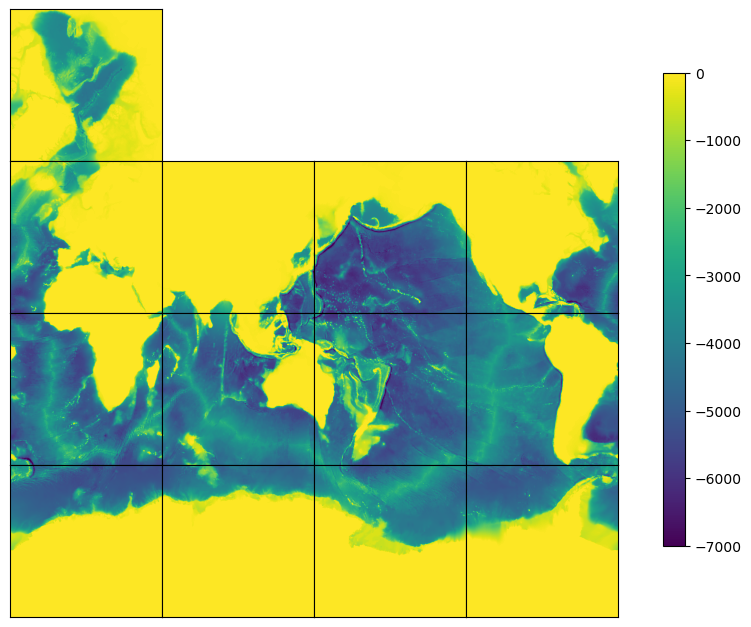

In [15]:
depth_tiles = ecco.llc_compact_to_tiles(depth)
ecco.plot_tiles(- depth_tiles, layout='latlon',rotate_to_latlon=True,show_tile_labels=False, show_colorbar=True)

(<Figure size 900x789 with 17 Axes>, None)

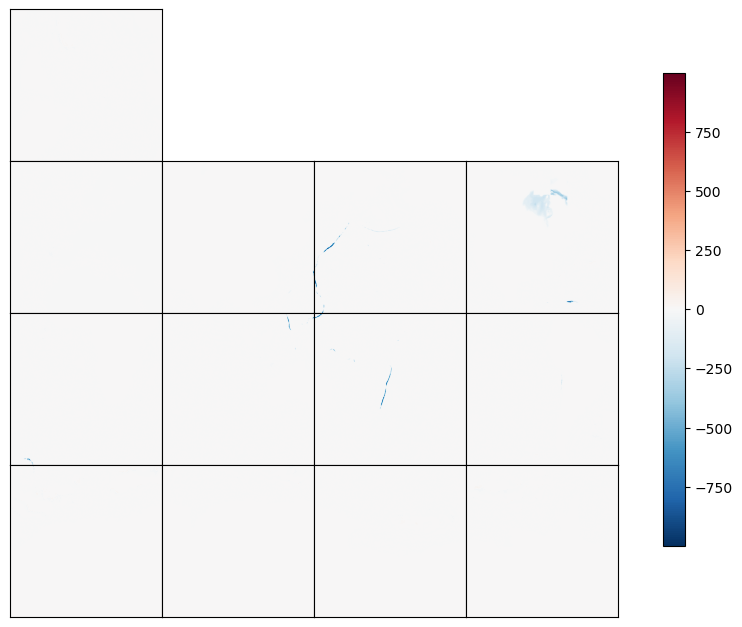

In [16]:
ecco.plot_tiles(tiles_old + depth_tiles, layout='latlon',rotate_to_latlon=True,show_tile_labels=False, show_colorbar=True)

In [17]:
num_pts_equal = (bathy_old == - depth).sum()
num_pts_equal / (nx*13*nx)

0.8555147330378812

In [18]:
np.shape(bathy_old)

(14040, 1080)

In [19]:
diff = bathy_old + depth
val, n = np.unique(diff, return_counts=True)

val

array([-999.95996 , -998.9175  , -998.8374  , ...,   47.815918,
         47.833496,   47.868652], dtype=float32)

(array([2.1990000e+03, 2.6000000e+01, 3.8000000e+01, 2.4000000e+01,
        2.7000000e+01, 4.0000000e+01, 2.3000000e+01, 3.0000000e+01,
        2.2000000e+01, 3.3000000e+01, 4.1000000e+01, 3.2000000e+01,
        3.7000000e+01, 3.1000000e+01, 3.6000000e+01, 3.1000000e+01,
        3.4000000e+01, 3.1000000e+01, 3.0000000e+01, 2.9000000e+01,
        3.7000000e+01, 3.0000000e+01, 3.3000000e+01, 2.9000000e+01,
        3.8000000e+01, 3.6000000e+01, 3.7000000e+01, 5.3000000e+01,
        2.9000000e+01, 3.8000000e+01, 4.6000000e+01, 4.6000000e+01,
        4.1000000e+01, 5.7000000e+01, 4.5000000e+01, 3.9000000e+01,
        4.8000000e+01, 4.8000000e+01, 4.3000000e+01, 4.6000000e+01,
        3.8000000e+01, 5.4000000e+01, 4.8000000e+01, 3.8000000e+01,
        5.5000000e+01, 4.2000000e+01, 5.4000000e+01, 5.1000000e+01,
        4.8000000e+01, 5.1000000e+01, 5.9000000e+01, 5.5000000e+01,
        6.3000000e+01, 8.1000000e+01, 7.9000000e+01, 7.5000000e+01,
        9.7000000e+01, 1.3500000e+02, 1.4200000e

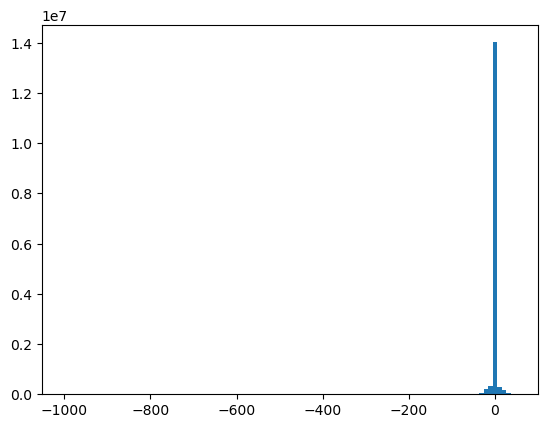

In [20]:
num_bins=100
plt.hist(diff.flatten(), num_bins)

## Save new bathymetry as negative

In [21]:
#write_float32('/home/shoshi/MITgcm_c68p/llc1080/run_template/LLC_1080_bathy_wet_r4.bin', -bathy.flatten())

In [23]:
tmp = read_float32('/home/shoshi/MITgcm_c68p/llc1080/run_template/LLC_1080_bathy_wet_r4.bin')


(15163200,)


## New bathymetry vs depth

In [23]:
run_dir = '/scratch/shoshi/MITgcm_c68p/llc1080/run_pk0000000000_120x120x757_eccopkg_off_new_bathy/'

depth = -read_float32(run_dir + 'Depth.data').reshape(nx*13,nx)
bathy = read_float32(run_dir + 'LLC_1080_bathy_wet_r4.bin').reshape(nx*13,nx)

(15163200,)
(15163200,)


llc_compact_to_faces: dims, llc  (14040, 1080) 1080
llc_compact_to_faces: data_compact array type  float32
llc_faces_to_tiles: data_tiles shape  (13, 1080, 1080)
llc_faces_to_tiles: data_tiles dtype  float32


(<Figure size 900x789 with 17 Axes>, None)

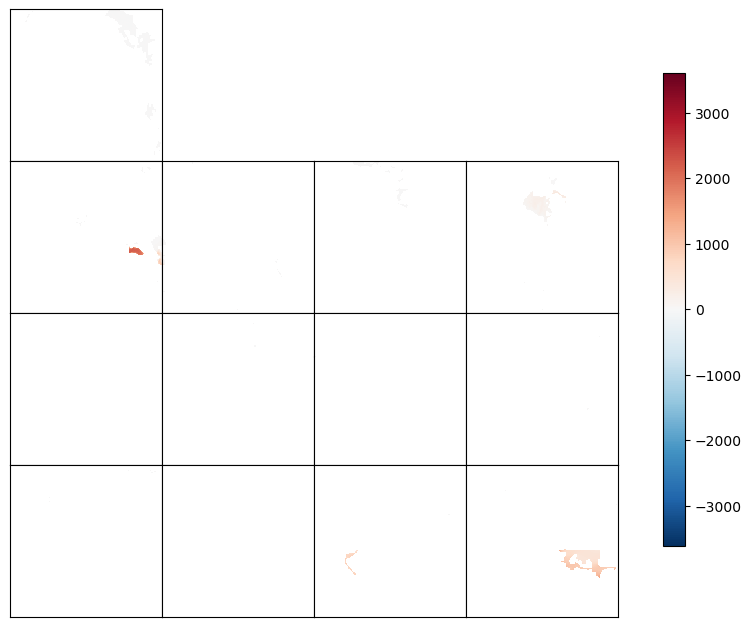

In [24]:
diff_tiles = ecco.llc_compact_to_tiles(depth-bathy)
diff_tiles[diff_tiles == 0] = np.nan
ecco.plot_tiles(diff_tiles, layout='latlon',rotate_to_latlon=True,show_tile_labels=False, show_colorbar=True)

(array([ 396019., 1444571.,  422580.,   10290.,   22325.,   19117.,
          37991.,    8735.]),
 array([ -50.,  -10.,   10.,   50.,  100.,  250.,  500., 1000., 2000.]),
 <BarContainer object of 8 artists>)

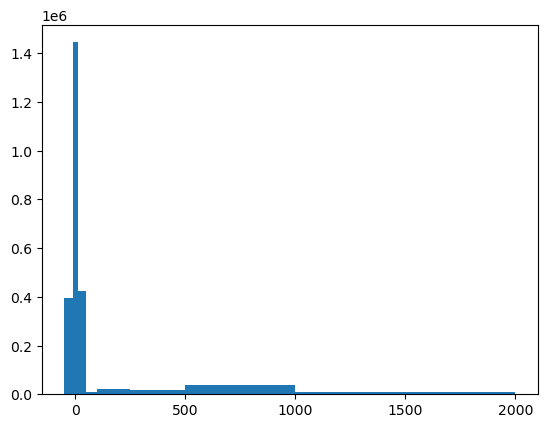

In [25]:
bins = [-50, -10, 10, 50, 100, 250, 500, 1000, 2000]
plt.hist(diff_tiles.flatten(), bins)

In [26]:
np.shape(diff_tiles)

(13, 1080, 1080)

In [42]:
# I can see how the difference in values compares to total value and look at delR in data to see vertical discretization
diff = depth - bathy
mask = diff != 0

len(diff[mask][np.abs(diff[mask]) > 1])
len(diff[mask])

2364957

In [37]:
bathy[mask], depth[mask]

(array([ -15., -756., -677., ..., -799., -793.,  -15.], dtype=float32),
 array([  -0.   , -758.126, -677.874, ..., -799.874, -791.35 ,   -0.   ],
       dtype=float32))